<a href="https://colab.research.google.com/github/ulfiizza27/2141720052-PCVK-2023/blob/main/week-06/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Kelompok 2 :
| Nama                                | No | NIM        |
| ----------------------------------- | -- | ---------- |
| Ulfi Mustatiq Abidatul Izza         | 26 | 2141720052 |

## 1. Melakukan import folder yang ada di Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Melakukan import beberapa library

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

## 3. Membuat histogram citra seperti output histogram berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena.jpg)


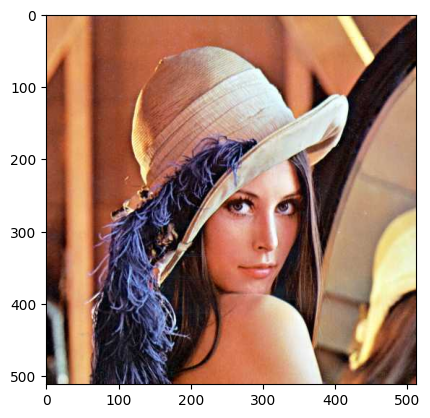

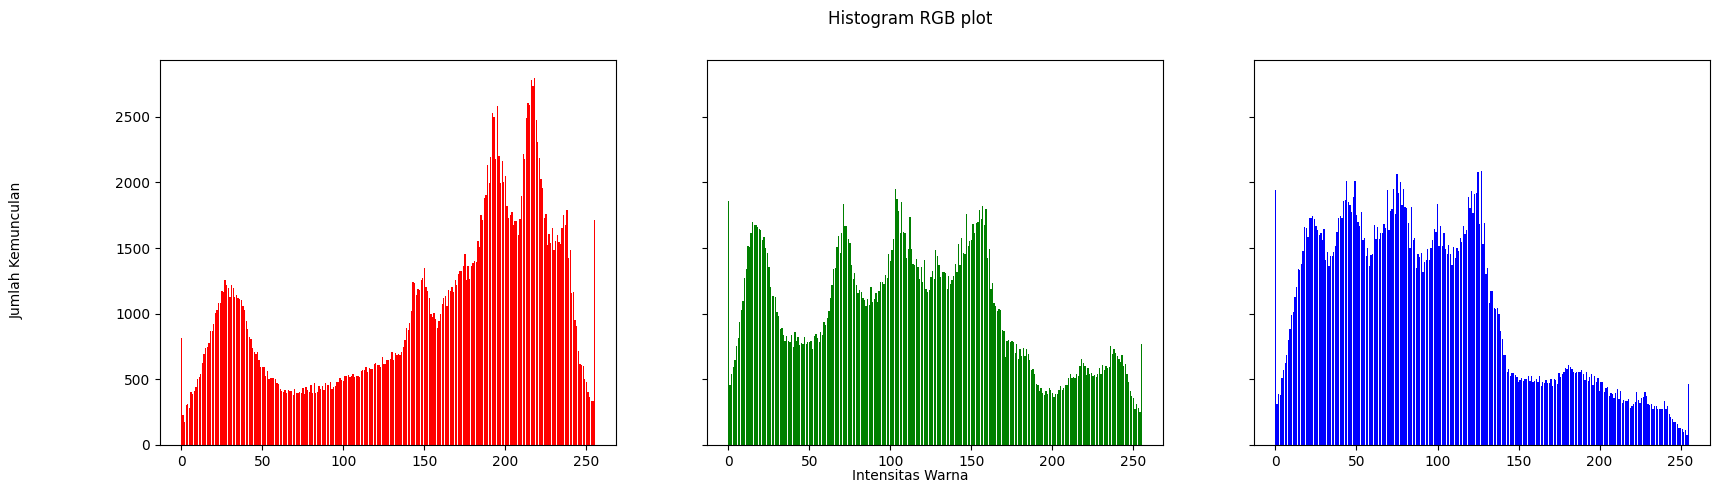

In [3]:
# Load gambar dalam format RGB
img = cv.imread('/content/drive/MyDrive/PCVK/img/lena.jpg', cv.IMREAD_COLOR)
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

# Mendapatkan dimensi gambar
height, width, depth = np.shape(img)
names = np.arange(256)

# Inisialisasi array untuk menghitung jumlah kemunculan intensitas warna
blue = [0]*256
green = [0]*256
red = [0]*256

# Menghitung jumlah kemunculan intensitas warna pada setiap piksel gambar
for y in range(0,height):
  for x in range(0,width):
    blue[img[y][x][0]] += 1
    green[img[y][x][1]] += 1
    red[img[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

plt.show()

## 4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?

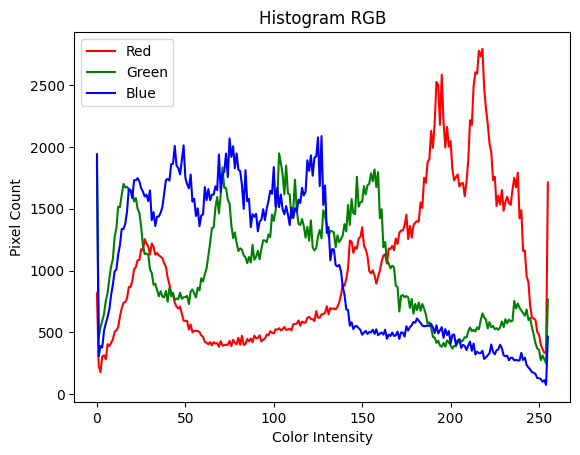

In [4]:
# Load the image in RGB format
img = cv.imread('/content/drive/MyDrive/PCVK/img/lena.jpg', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Split the image into color channels (R, G, B)
red_channel = img[:, :, 0]
green_channel = img[:, :, 1]
blue_channel = img[:, :, 2]

# Calculate the histograms for each color channel
red_hist = np.histogram(red_channel, bins=256, range=[0, 256])[0]
green_hist = np.histogram(green_channel, bins=256, range=[0, 256])[0]
blue_hist = np.histogram(blue_channel, bins=256, range=[0, 256])[0]

# Display the RGB histogram plot
plt.figure()
plt.title('Histogram RGB')
plt.xlabel('Color Intensity')
plt.ylabel('Pixel Count')
plt.plot(red_hist, color='red')
plt.plot(green_hist, color='green')
plt.plot(blue_hist, color='blue')
plt.legend(['Red', 'Green', 'Blue'])
plt.show()

## 5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

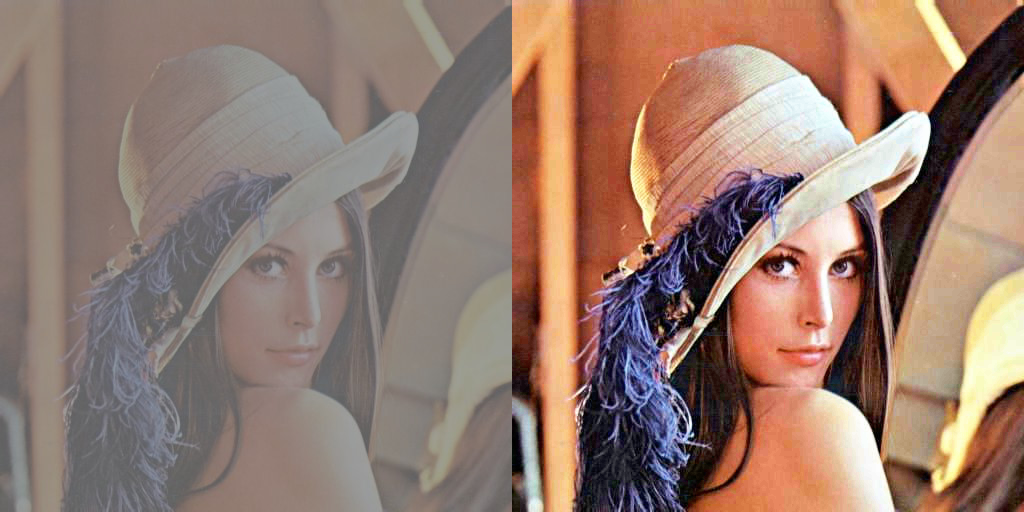

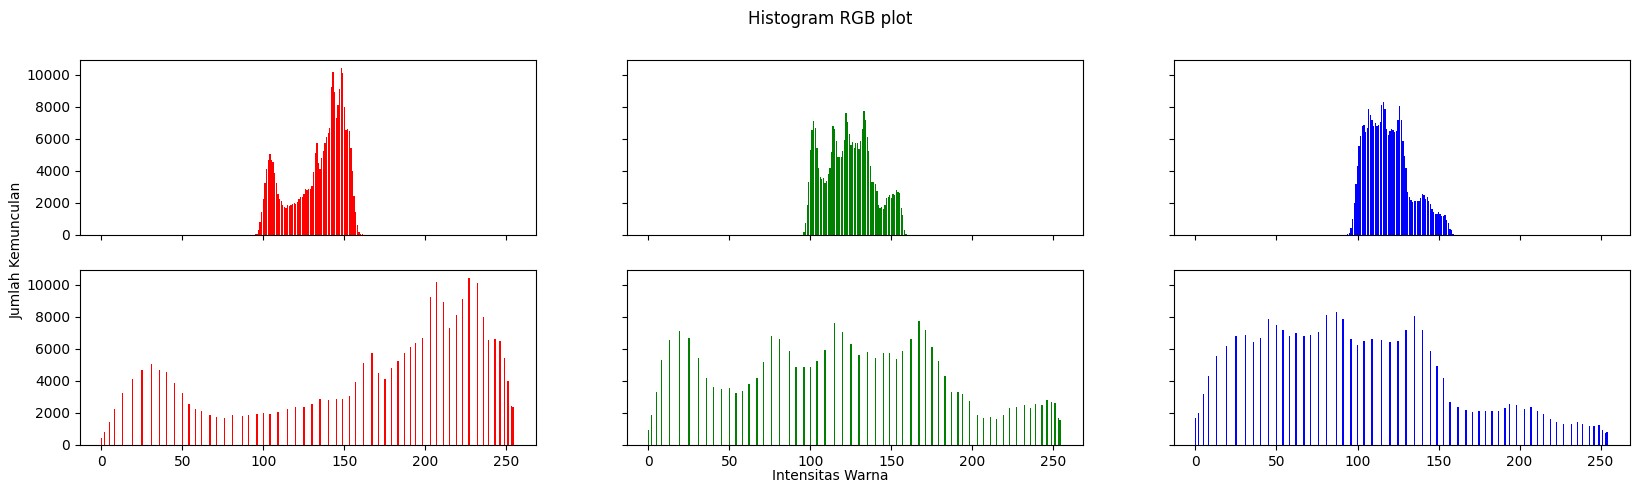

In [5]:
# Step 1: Read the image
img1 = cv.imread('/content/drive/MyDrive/PCVK/img/lena_lc.jpg')

# Step 2: Define the histogram function
def histog(img1):
  # Get the image dimensions
  height, width, depth = np.shape(img1)

  # Create an array to store the histogram values
  ax = np.zeros((3,256))

  # Iterate over each pixel in the image
  for y in range(0,height) :
    for x in range(0,width) :
      # Increment the histogram values for each channel
      ax[0][img1[y][x][0]] += 1
      ax[1][img1[y][x][1]] += 1
      ax[2][img1[y][x][2]] += 1

  # Return the histogram array
  return ax

# Step 3: Calculate the original histogram
histo_asli = histog(img1)

# Step 4: Convert the image to a numpy array
img_array = np.asarray(img1)

# Step 5: Calculate the normalized cumulative histogram
histogram_array = np.bincount(img_array.flatten(), minlength=256)
num_pixels = np.sum(histogram_array)
histogram_array = histogram_array / num_pixels
chistogram_array = np.cumsum(histogram_array)

# Step 6: Create the pixel mapping lookup table
transform_map = np.floor(255 * chistogram_array).astype(np.uint8)

# Step 7: Perform the transformation
img_list = list(img_array.flatten())
eq_img_list = [transform_map[p] for p in img_list]
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

# Step 8: Calculate the equalized histogram
equal_histo = histog(img2)

# Step 9: Concatenate the original and equalized images
final_frame = cv.hconcat((img1, img2))
cv2_imshow(final_frame)

# Step 10: Plot the histograms
names = np.arange(256)
isgrayimg = np.array_equal(blue, green) and np.array_equal(blue, red)
if (isgrayimg == False):
  # Plot RGB histograms if the image is not grayscale
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, equal_histo[2], color='red')
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue')
else:
  # Plot grayscale histograms if the image is grayscale
  fig, axs = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

## 6.  Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan hasilnya. Apakah output muncul sama?